In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("gbh_step_one_output_maximumrelevance.csv")
# df['pub_date'][0]
df.head(5)

,Unnamed: 0.1,Unnamed: 0,neighborhoods,position_section,tracts,author,body,content_id,hl1,hl2,pub_date,pub_name,link,bertopic_topic_label,Keyword_1,Keyword_2,Keyword_3
0,0,0,['Fenway'],Education,['010300'],Esteban Bustillos,"Thomas White, a senior at Boston Latin School,...",00000175-7583-d779-a575-779f0f6b0001,"For High School Athletes, The Pandemic Has Led...","For High School Athletes, The Pandemic Has Led...",2020-11-11 00:00:00,GBH,https://wgbh.org/news/education/2020/11/11/for...,-1,NaN,NaN,NaN
1,1,1,"['Downtown', 'Beacon Hill']",Politics,"['981700', '020302']",Mike Deehan,A wave of blue votes could wash over the Massa...,00000175-75fe-d5c8-a775-f7fe5a7f0001,Mass. Republicans Don't Fear Trump-Fueled Blue...,Mass. Republicans Don't Fear Trump-Fueled Blue...,2020-11-03 00:00:00,GBH,https://wgbh.org/news/politics/2020/11/03/mass...,5,Family,Funeral,Life stages
2,2,2,"['Dorchester', 'Mattapan']",Politics,"['100900', '100700']",Adam Reilly,It’s unlikely Donald Trump will win Massachuse...,00000175-7aad-d944-a9fd-7aed30970002,Trump Won't Win Boston — But He Might Win This...,Trump Won't Win Boston — But He Might Win This...,2020-11-02 00:00:00,GBH,https://wgbh.org/news/politics/2020/11/02/trum...,-1,NaN,NaN,NaN
3,3,3,['Downtown'],News,['030302'],Craig LeMoult,The state Department of Public Health released...,00000175-7b20-d944-a9fd-7be1d4bf0001,Household 'Clusters' Are A Problem In Massachu...,Household 'Clusters' Are A Problem In Massachu...,2020-11-01 00:00:00,GBH,https://wgbh.org/news/local-news/2020/11/01/ho...,27,Drug Crisis,Legislation,Public Health
4,4,4,['Jamaica Plain'],Education,['120400'],Kirk Carapezza,"A couple of years ago, Daymian Mejia, a senior...",00000175-7b24-d5c8-a775-fb2c49a40001,'A Tint Over Everything': College Students Of ...,'A Tint Over Everything': College Students Of ...,2020-11-10 00:00:00,GBH,https://wgbh.org/news/education/2020/11/10/a-t...,-1,NaN,NaN,NaN


In [4]:
df['bertopic_topic_label'].value_counts()

bertopic_topic_label
-1     1230
 27     399
 5      300
 6      187
 3      109
       ... 
 53       1
 68       1
 43       1
 73       1
 89       1
Name: count, Length: 71, dtype: int64

In [14]:
def filter_and_count_keywords(df, neighborhoods=None, tracts=None, pub_date=None):
    """
    Filter the DataFrame based on specified columns and display value counts of target columns.
    """
    # Filter DataFrame based on optional arguments
    if neighborhoods:
        df = df[df['neighborhoods'].str.contains(neighborhoods)]
    if tracts:
        df = df[df['tracts'].str.contains(tracts)]
    if pub_date:
        df = df[df['pub_date'].str.contains(pub_date)]
    
    # Display value counts of target columns
    target_columns = ['Keyword_1', 'Keyword_2', 'Keyword_3']
    all_keywords = df[target_columns].dropna().apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
    # Combine all keyword columns into a single Series
    # all_keywords = pd.concat([df[column] for column in target_columns]).dropna()

    # Compute the value counts for all keywords
    keyword_counts = all_keywords.value_counts()

    # Create a bar chart
    plt.figure(figsize=(16, 6))  # Adjust figure size as per your preference
    plt.bar(keyword_counts.index[:10], keyword_counts.values[:10])

    # Set labels and title
    plt.xlabel('Keyword')
    plt.ylabel('Frequency')
    plt.title('Combined Keyword Frequency (Top 10)')

    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)

    # Show the bar chart
    plt.show() 

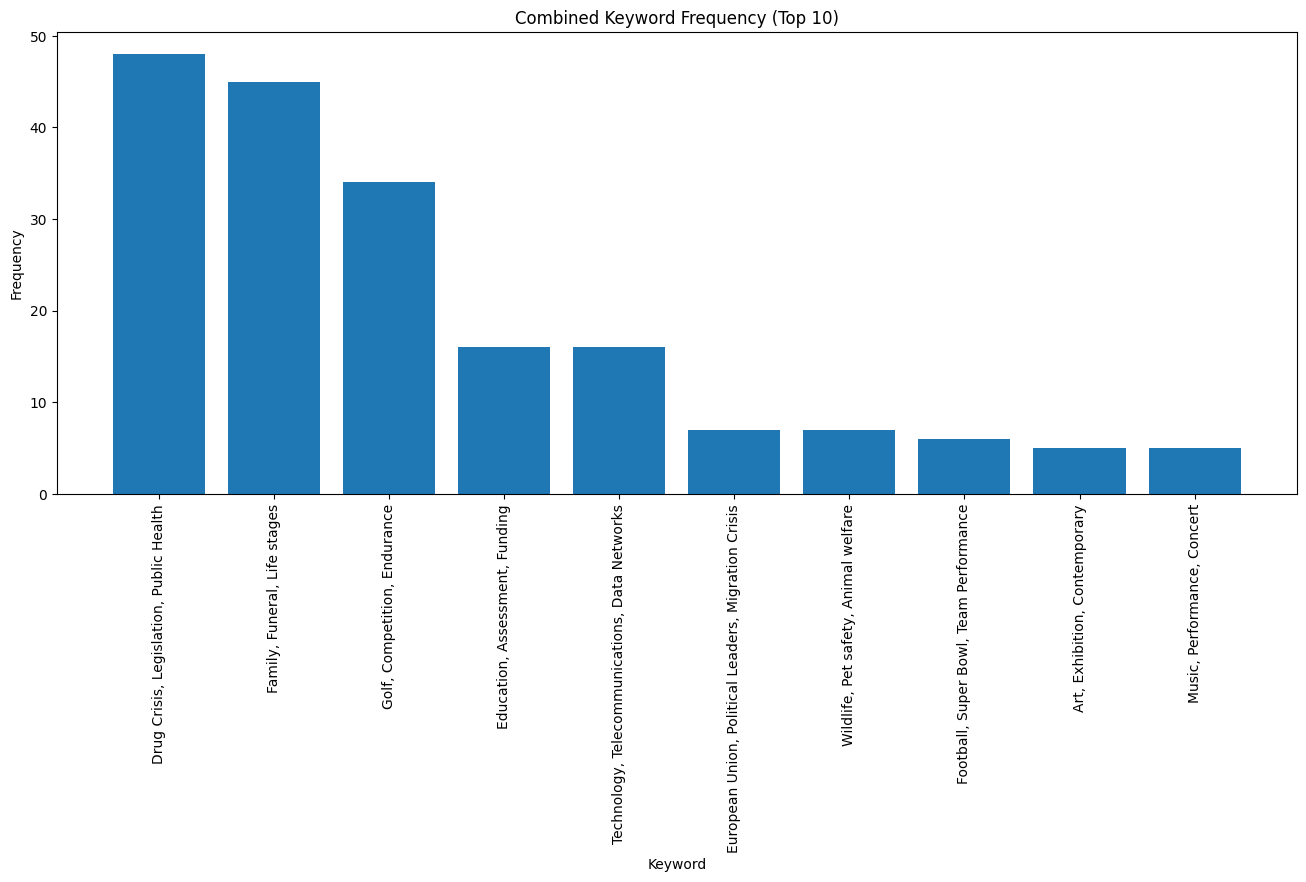

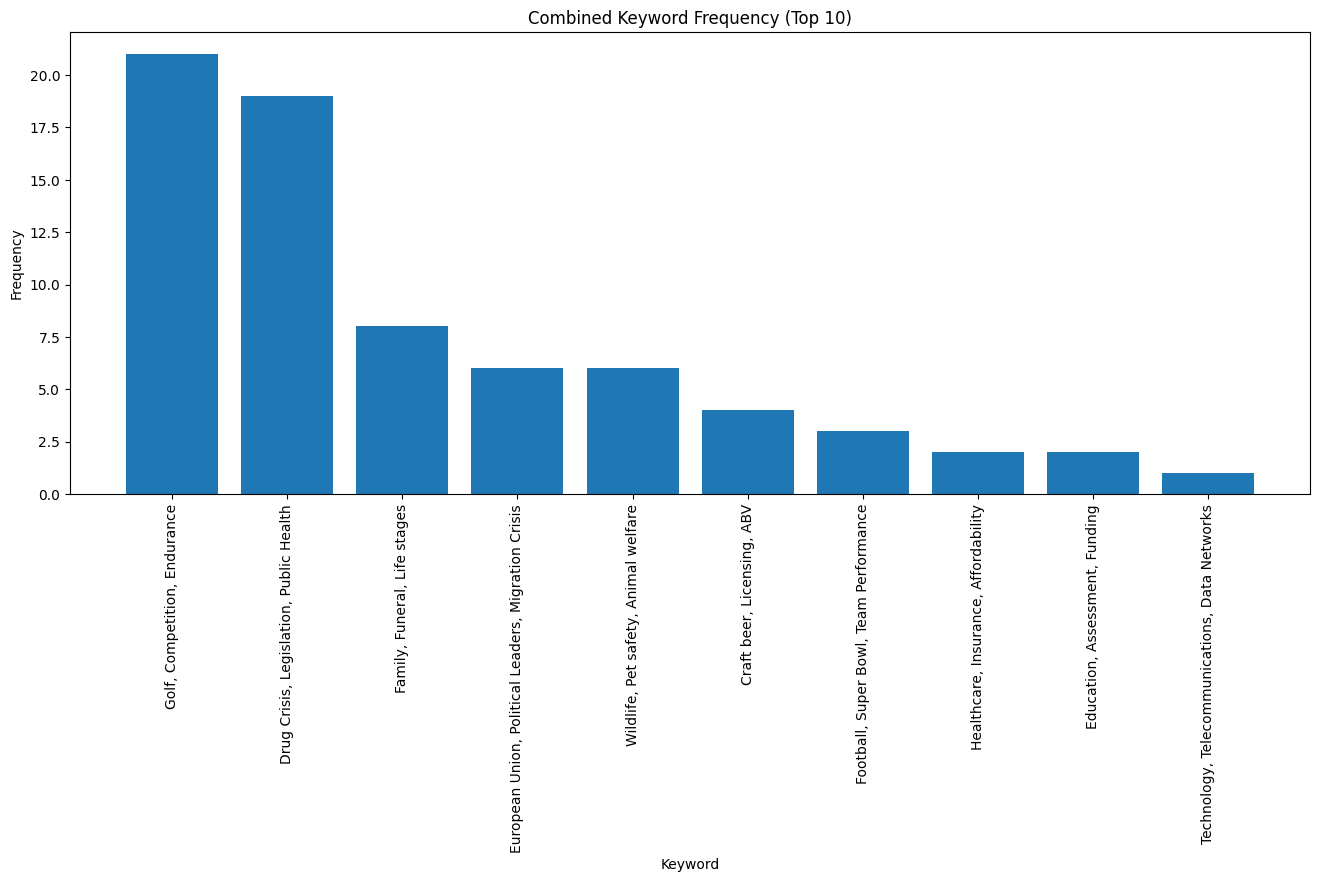

In [15]:
# Filter based on 'neighborhoods' and display value counts of keywords
filter_and_count_keywords(df, neighborhoods='South Boston')

# Filter based on 'tracts' and 'time' and display value counts of keywords
filter_and_count_keywords(df, tracts='070104')

# Only display value counts of keywords without filtering
# filter_and_count_keywords(df)